In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./medals.csv')
data.head()

,discipline_title,slug_game,event_title,event_gender,medal_type,participant_type,participant_title,athlete_url,athlete_full_name,country_name,country_code,country_3_letter_code
0,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,https://olympics.com/en/athletes/stefania-cons...,Stefania CONSTANTINI,Italy,IT,ITA
1,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,https://olympics.com/en/athletes/amos-mosaner,Amos MOSANER,Italy,IT,ITA
2,Curling,beijing-2022,Mixed Doubles,Mixed,SILVER,GameTeam,Norway,https://olympics.com/en/athletes/kristin-skaslien,Kristin SKASLIEN,Norway,NO,NOR
3,Curling,beijing-2022,Mixed Doubles,Mixed,SILVER,GameTeam,Norway,https://olympics.com/en/athletes/magnus-nedreg...,Magnus NEDREGOTTEN,Norway,NO,NOR
4,Curling,beijing-2022,Mixed Doubles,Mixed,BRONZE,GameTeam,Sweden,https://olympics.com/en/athletes/almida-de-val,Almida DE VAL,Sweden,SE,SWE


In [3]:
data.isna().sum()

discipline_title             0
slug_game                    0
event_title                  0
event_gender                 0
medal_type                   0
participant_type             0
participant_title        15113
athlete_url               4670
athlete_full_name         3624
country_name                 0
country_code              1502
country_3_letter_code        0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21697 entries, 0 to 21696
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   discipline_title       21697 non-null  object
 1   slug_game              21697 non-null  object
 2   event_title            21697 non-null  object
 3   event_gender           21697 non-null  object
 4   medal_type             21697 non-null  object
 5   participant_type       21697 non-null  object
 6   participant_title      6584 non-null   object
 7   athlete_url            17027 non-null  object
 8   athlete_full_name      18073 non-null  object
 9   country_name           21697 non-null  object
 10  country_code           20195 non-null  object
 11  country_3_letter_code  21697 non-null  object
dtypes: object(12)
memory usage: 2.0+ MB


In [5]:
data = data.fillna("NA")

In [6]:
data.isna().sum()

discipline_title         0
slug_game                0
event_title              0
event_gender             0
medal_type               0
participant_type         0
participant_title        0
athlete_url              0
athlete_full_name        0
country_name             0
country_code             0
country_3_letter_code    0
dtype: int64

In [7]:
data.tail()

,discipline_title,slug_game,event_title,event_gender,medal_type,participant_type,participant_title,athlete_url,athlete_full_name,country_name,country_code,country_3_letter_code
21692,Weightlifting,athens-1896,heavyweight - one hand lift men,Men,SILVER,Athlete,NA,https://olympics.com/en/athletes/viggo-jensen,Viggo JENSEN,Denmark,DK,DEN
21693,Weightlifting,athens-1896,heavyweight - one hand lift men,Men,BRONZE,Athlete,NA,NA,Alexandros Nikolopoulos,Greece,GR,GRE
21694,Weightlifting,athens-1896,heavyweight - two hand lift men,Men,GOLD,Athlete,NA,https://olympics.com/en/athletes/viggo-jensen,Viggo JENSEN,Denmark,DK,DEN
21695,Weightlifting,athens-1896,heavyweight - two hand lift men,Men,SILVER,Athlete,NA,https://olympics.com/en/athletes/launceston-el...,Launceston ELLIOT,Great Britain,GB,GBR
21696,Weightlifting,athens-1896,heavyweight - two hand lift men,Men,BRONZE,Athlete,NA,https://olympics.com/en/athletes/sotirios-versis,Sotirios VERSIS,Greece,GR,GRE


In [8]:
def extractYear(str):
    return str.split('-')[-1]

In [9]:
data['year'] = data['slug_game'].apply(lambda x:extractYear(x))

In [10]:
data.head()

,discipline_title,slug_game,event_title,event_gender,medal_type,participant_type,participant_title,athlete_url,athlete_full_name,country_name,country_code,country_3_letter_code,year
0,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,https://olympics.com/en/athletes/stefania-cons...,Stefania CONSTANTINI,Italy,IT,ITA,2022
1,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,https://olympics.com/en/athletes/amos-mosaner,Amos MOSANER,Italy,IT,ITA,2022
2,Curling,beijing-2022,Mixed Doubles,Mixed,SILVER,GameTeam,Norway,https://olympics.com/en/athletes/kristin-skaslien,Kristin SKASLIEN,Norway,NO,NOR,2022
3,Curling,beijing-2022,Mixed Doubles,Mixed,SILVER,GameTeam,Norway,https://olympics.com/en/athletes/magnus-nedreg...,Magnus NEDREGOTTEN,Norway,NO,NOR,2022
4,Curling,beijing-2022,Mixed Doubles,Mixed,BRONZE,GameTeam,Sweden,https://olympics.com/en/athletes/almida-de-val,Almida DE VAL,Sweden,SE,SWE,2022


In [11]:
def extractLoc(str):
    return "-".join(i for i in str.split('-')[0:-1])

In [12]:
data['olympic_location'] = data['slug_game'].apply(lambda x:extractLoc(x))

In [13]:
data.head()

,discipline_title,slug_game,event_title,event_gender,medal_type,participant_type,participant_title,athlete_url,athlete_full_name,country_name,country_code,country_3_letter_code,year,olympic_location
0,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,https://olympics.com/en/athletes/stefania-cons...,Stefania CONSTANTINI,Italy,IT,ITA,2022,beijing
1,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,https://olympics.com/en/athletes/amos-mosaner,Amos MOSANER,Italy,IT,ITA,2022,beijing
2,Curling,beijing-2022,Mixed Doubles,Mixed,SILVER,GameTeam,Norway,https://olympics.com/en/athletes/kristin-skaslien,Kristin SKASLIEN,Norway,NO,NOR,2022,beijing
3,Curling,beijing-2022,Mixed Doubles,Mixed,SILVER,GameTeam,Norway,https://olympics.com/en/athletes/magnus-nedreg...,Magnus NEDREGOTTEN,Norway,NO,NOR,2022,beijing
4,Curling,beijing-2022,Mixed Doubles,Mixed,BRONZE,GameTeam,Sweden,https://olympics.com/en/athletes/almida-de-val,Almida DE VAL,Sweden,SE,SWE,2022,beijing


In [14]:
data.drop(['athlete_url'], inplace=True, axis='columns')

In [15]:
data.head()

,discipline_title,slug_game,event_title,event_gender,medal_type,participant_type,participant_title,athlete_full_name,country_name,country_code,country_3_letter_code,year,olympic_location
0,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,Stefania CONSTANTINI,Italy,IT,ITA,2022,beijing
1,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,Amos MOSANER,Italy,IT,ITA,2022,beijing
2,Curling,beijing-2022,Mixed Doubles,Mixed,SILVER,GameTeam,Norway,Kristin SKASLIEN,Norway,NO,NOR,2022,beijing
3,Curling,beijing-2022,Mixed Doubles,Mixed,SILVER,GameTeam,Norway,Magnus NEDREGOTTEN,Norway,NO,NOR,2022,beijing
4,Curling,beijing-2022,Mixed Doubles,Mixed,BRONZE,GameTeam,Sweden,Almida DE VAL,Sweden,SE,SWE,2022,beijing


In [16]:
data.shape

(21697, 13)

In [17]:
import re

def removePunctuationsAndNumbers(text):
    newText = re.sub('[^A-Za-z]+', ' ', text).strip()
    return newText

In [18]:
data['participant_title_cleaned'] = data['participant_title'].apply(lambda x:removePunctuationsAndNumbers(x))

In [19]:
data.iloc[np.where((data['country_name'] != data['participant_title']) & (data['participant_title_cleaned'] != 'NA'))[0]]

,discipline_title,slug_game,event_title,event_gender,medal_type,participant_type,participant_title,athlete_full_name,country_name,country_code,country_3_letter_code,year,olympic_location,participant_title_cleaned
30,Freestyle Skiing,beijing-2022,Mixed Team Aerials,Mixed,GOLD,GameTeam,United States,NA,United States of America,US,USA,2022,beijing,United States
31,Freestyle Skiing,beijing-2022,Mixed Team Aerials,Mixed,SILVER,GameTeam,China,NA,People's Republic of China,CN,CHN,2022,beijing,China
81,Snowboard,beijing-2022,Mixed Team Snowboard Cross,Mixed,GOLD,GameTeam,United States of America 1,Nick BAUMGARTNER,United States of America,US,USA,2022,beijing,United States of America
82,Snowboard,beijing-2022,Mixed Team Snowboard Cross,Mixed,GOLD,GameTeam,United States of America 1,Lindsey JACOBELLIS,United States of America,US,USA,2022,beijing,United States of America
83,Snowboard,beijing-2022,Mixed Team Snowboard Cross,Mixed,SILVER,GameTeam,Italy 1,Omar VISINTIN,Italy,IT,ITA,2022,beijing,Italy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21683,Tennis,athens-1896,doubles men,Men,GOLD,GameTeam,Mixed team #2,Fritz Traun,MIX,NA,MIX,1896,athens,Mixed team
21684,Tennis,athens-1896,doubles men,Men,SILVER,GameTeam,Greece team #1,Demetrius Casdagli,Greece,GR,GRE,1896,athens,Greece team
21685,Tennis,athens-1896,doubles men,Men,SILVER,GameTeam,Greece team #1,Dimitrios PETROKOKKINOS,Greece,GR,GRE,1896,athens,Greece team
21686,Tennis,athens-1896,doubles men,Men,BRONZE,GameTeam,Mixed team #1,Edwin FLACK,MIX,NA,MIX,1896,athens,Mixed team


In [20]:
data['medal_type'].value_counts().index

Index(['BRONZE', 'GOLD', 'SILVER'], dtype='object')

<BarContainer object of 3 artists>

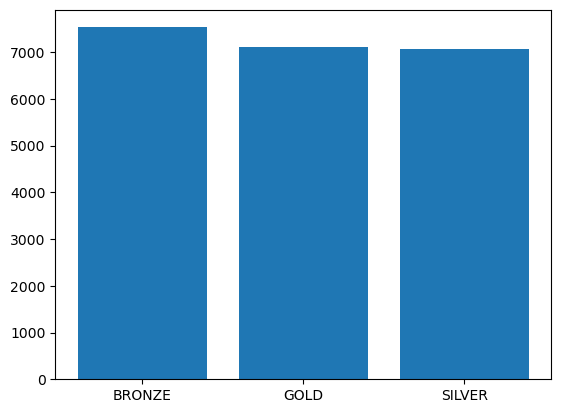

In [21]:
plt.bar(data['medal_type'].value_counts().index, data['medal_type'].value_counts())

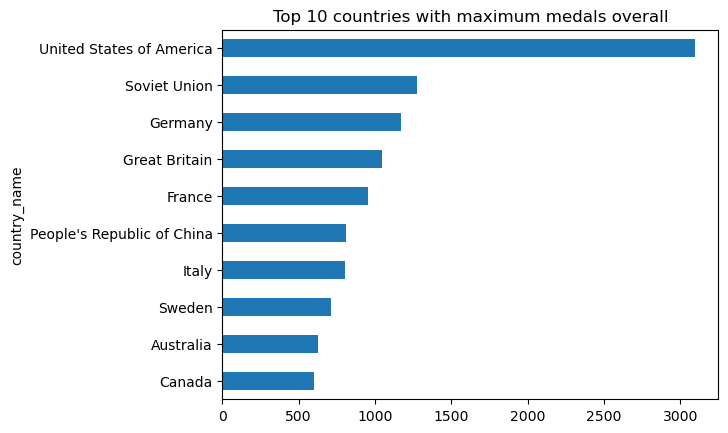

In [22]:
df = data.groupby(['country_name']).count()['medal_type'].sort_values(ascending=False)[0:10].sort_values()
# plt.figure(figsize=(10,30))
df.plot.barh(df.index, df.values)
plt.title("Top 10 countries with maximum medals overall")
plt.show()

In [23]:
data['year'] = pd.to_numeric(data['year'])

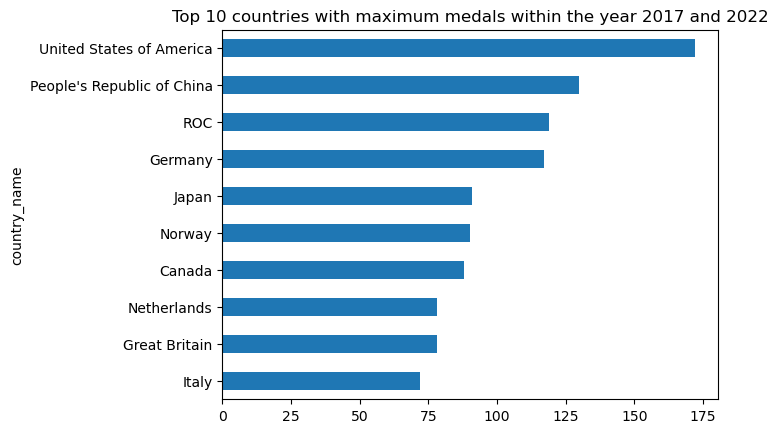

In [24]:
df = data[(data['year'] <= 2022) & (data['year'] >= 2017)].groupby(['country_name']).count()['medal_type'].sort_values(ascending=False)[0:10].sort_values()
# plt.figure(figsize=(10,30))
df.plot.barh(df.index, df.values)
plt.title("Top 10 countries with maximum medals within the year 2017 and 2022")
plt.show()

In [25]:
data.head(2)

,discipline_title,slug_game,event_title,event_gender,medal_type,participant_type,participant_title,athlete_full_name,country_name,country_code,country_3_letter_code,year,olympic_location,participant_title_cleaned
0,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,Stefania CONSTANTINI,Italy,IT,ITA,2022,beijing,Italy
1,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,Amos MOSANER,Italy,IT,ITA,2022,beijing,Italy


In [26]:
df = pd.pivot_table(
    data[(data['year'] <= 2022) & (data['year'] >= 2017)], 
    index=['country_name'], 
    columns=['medal_type'], 
    aggfunc='count'
)['country_3_letter_code'].fillna(0).astype(int)
df['total_medals'] = df.sum(axis=1, numeric_only=True).astype(int)
df = df.sort_values(by=['total_medals'], ascending=False)

In [27]:
df

medal_type,BRONZE,GOLD,SILVER,total_medals
country_name,,,,
United States of America,50,59,63,172
People's Republic of China,23,57,50,130
ROC,44,29,46,119
Germany,35,44,38,117
Japan,31,35,25,91
...,...,...,...,...
Kuwait,1,0,0,1
Liechtenstein,1,0,0,1
Lithuania,0,0,1,1


In [28]:
data

,discipline_title,slug_game,event_title,event_gender,medal_type,participant_type,participant_title,athlete_full_name,country_name,country_code,country_3_letter_code,year,olympic_location,participant_title_cleaned
0,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,Stefania CONSTANTINI,Italy,IT,ITA,2022,beijing,Italy
1,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,Amos MOSANER,Italy,IT,ITA,2022,beijing,Italy
2,Curling,beijing-2022,Mixed Doubles,Mixed,SILVER,GameTeam,Norway,Kristin SKASLIEN,Norway,NO,NOR,2022,beijing,Norway
3,Curling,beijing-2022,Mixed Doubles,Mixed,SILVER,GameTeam,Norway,Magnus NEDREGOTTEN,Norway,NO,NOR,2022,beijing,Norway
4,Curling,beijing-2022,Mixed Doubles,Mixed,BRONZE,GameTeam,Sweden,Almida DE VAL,Sweden,SE,SWE,2022,beijing,Sweden
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21692,Weightlifting,athens-1896,heavyweight - one hand lift men,Men,SILVER,Athlete,NA,Viggo JENSEN,Denmark,DK,DEN,1896,athens,NA
21693,Weightlifting,athens-1896,heavyweight - one hand lift men,Men,BRONZE,Athlete,NA,Alexandros Nikolopoulos,Greece,GR,GRE,1896,athens,NA
21694,Weightlifting,athens-1896,heavyweight - two hand lift men,Men,GOLD,Athlete,NA,Viggo JENSEN,Denmark,DK,DEN,1896,athens,NA
21695,Weightlifting,athens-1896,heavyweight - two hand lift men,Men,SILVER,Athlete,NA,Launceston ELLIOT,Great Britain,GB,GBR,1896,athens,NA


In [29]:
df = pd.pivot_table(
    data,
    index=['discipline_title'],
    columns=['medal_type'],
    aggfunc='count'
)['country_3_letter_code'].fillna(0).astype(int)
df['total_medals'] = df.sum(axis=1, numeric_only=True).astype(int)
# df = df.sort_values(by=['total_medals'], ascending=False)

<Axes: ylabel='discipline_title'>

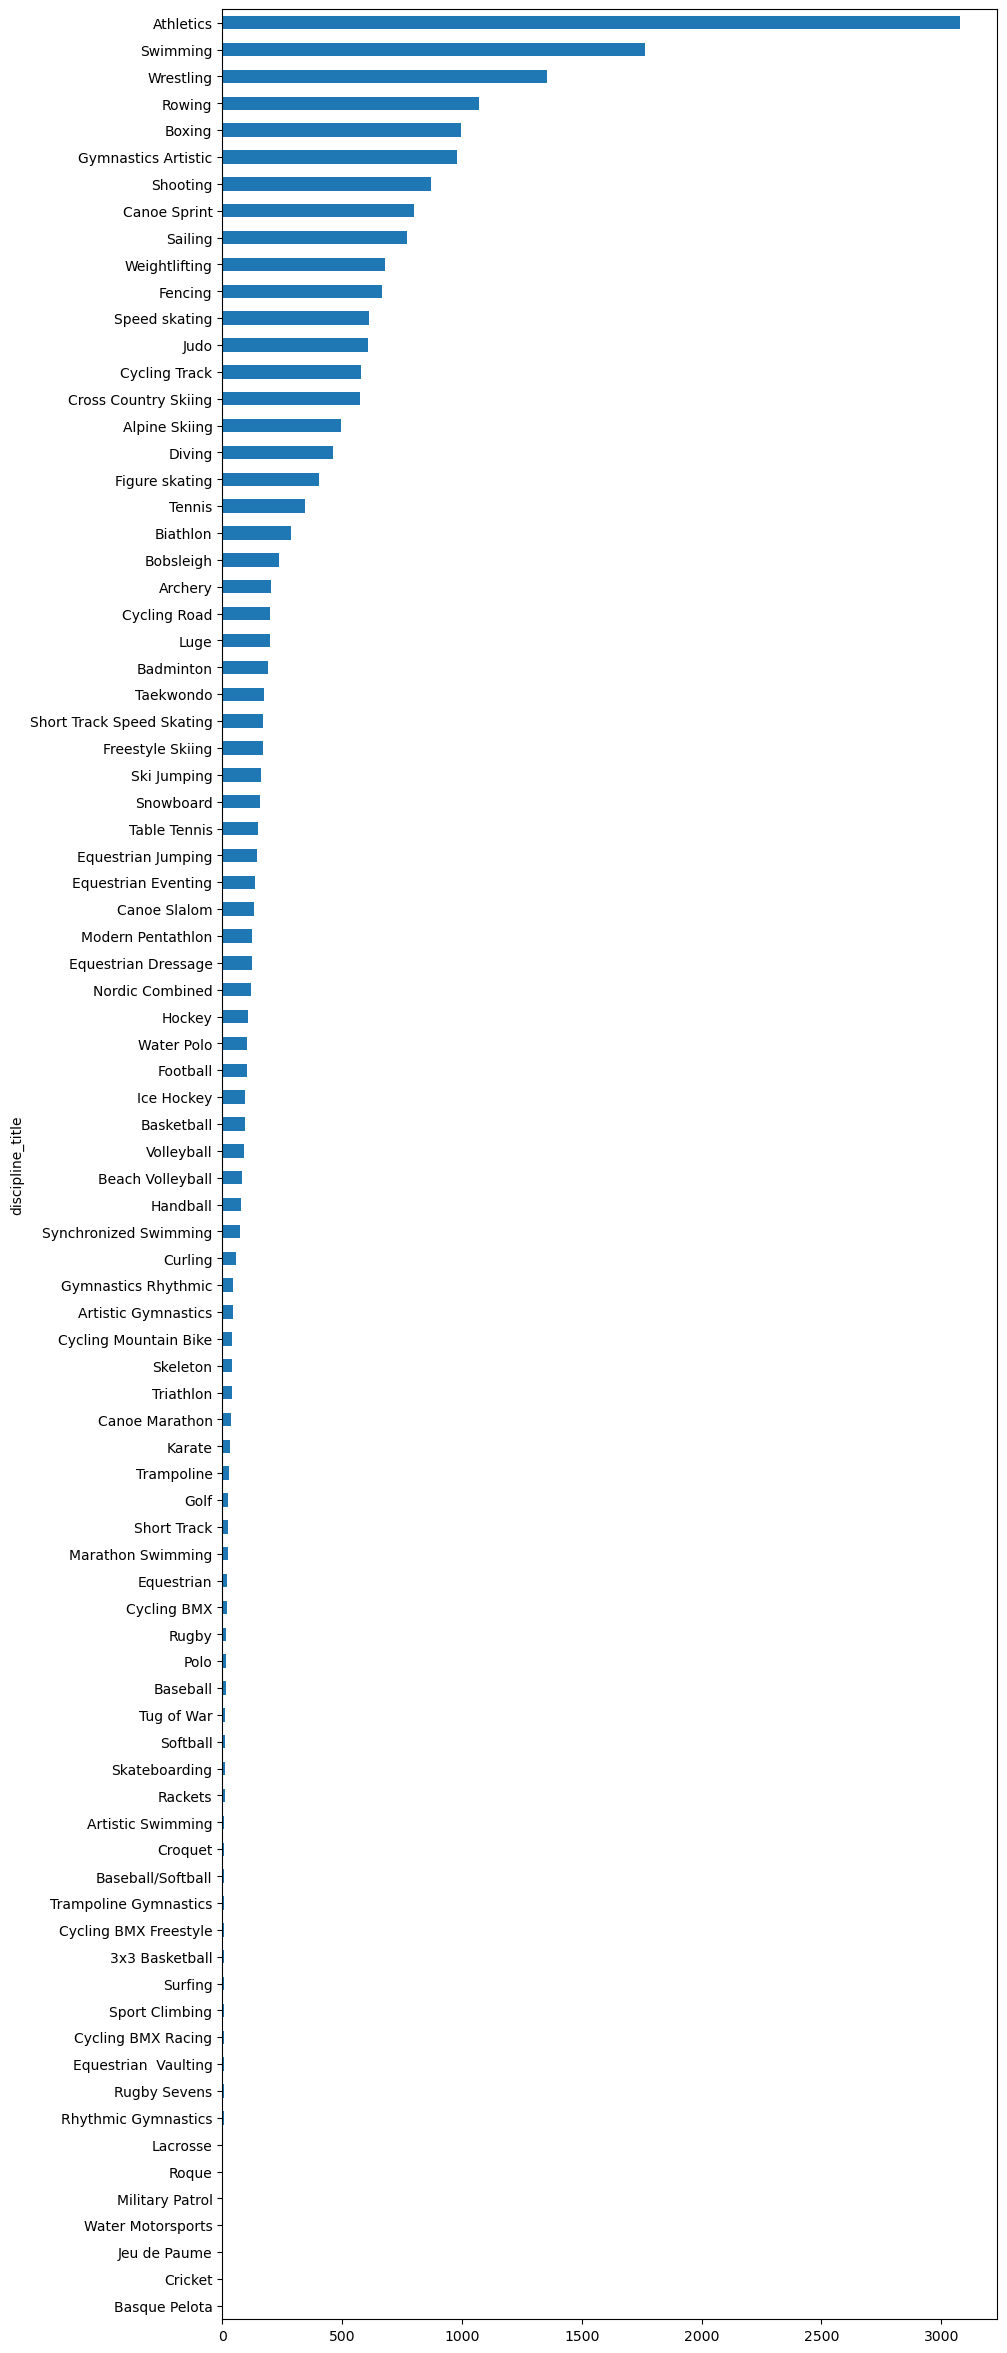

In [30]:
df = df.sort_values(by=['total_medals'])
plt.figure(figsize=(10,30))
df['total_medals'].plot.barh(df['total_medals'].index, df['total_medals'].values)

In [31]:
data.head()

,discipline_title,slug_game,event_title,event_gender,medal_type,participant_type,participant_title,athlete_full_name,country_name,country_code,country_3_letter_code,year,olympic_location,participant_title_cleaned
0,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,Stefania CONSTANTINI,Italy,IT,ITA,2022,beijing,Italy
1,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,Amos MOSANER,Italy,IT,ITA,2022,beijing,Italy
2,Curling,beijing-2022,Mixed Doubles,Mixed,SILVER,GameTeam,Norway,Kristin SKASLIEN,Norway,NO,NOR,2022,beijing,Norway
3,Curling,beijing-2022,Mixed Doubles,Mixed,SILVER,GameTeam,Norway,Magnus NEDREGOTTEN,Norway,NO,NOR,2022,beijing,Norway
4,Curling,beijing-2022,Mixed Doubles,Mixed,BRONZE,GameTeam,Sweden,Almida DE VAL,Sweden,SE,SWE,2022,beijing,Sweden
